## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [1]:
api_key = "TAVCY8EK81A1XEWR"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [2]:
ticker = "FB"

Import the appropriate libraries in the lines below each comment:

In [3]:
# pandas
import pandas as pd
# requests
import requests
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# mmatplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request
(refer to the Alpha Vantage documention)

Assign the API url to the variable "link" and format the url string to include the "api_key" variable and the "ticker".

In [4]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=5min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=FB&interval=5min&apikey=TAVCY8EK81A1XEWR


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [5]:
fb = requests.get(link)

Print the HTTP response:

In [6]:
print(fb)

<Response [200]>


Print the data:

In [7]:
print(fb.text)

{
    "Meta Data": {
        "1. Information": "Intraday (5min) open, high, low, close prices and volume",
        "2. Symbol": "FB",
        "3. Last Refreshed": "2019-09-25 16:00:00",
        "4. Interval": "5min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (5min)": {
        "2019-09-25 16:00:00": {
            "1. open": "182.8300",
            "2. high": "182.9300",
            "3. low": "182.7300",
            "4. close": "182.7800",
            "5. volume": "436003"
        },
        "2019-09-25 15:55:00": {
            "1. open": "183.2100",
            "2. high": "183.2500",
            "3. low": "182.8500",
            "4. close": "182.8500",
            "5. volume": "236376"
        },
        "2019-09-25 15:50:00": {
            "1. open": "182.9800",
            "2. high": "183.2600",
            "3. low": "182.9200",
            "4. close": "183.2300",
            "5. volume": "221448"
        },
        "2019-09-25 

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier:

In [8]:
ts = TimeSeries(key=api_key,output_format='pandas')
data, meta_data = ts.get_intraday(symbol='TSLA',interval='1min', outputsize='compact')
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-25 14:21:00  225.6700  225.9750  225.6564  225.8822    16860.0
2019-09-25 14:22:00  225.9500  226.1300  225.9200  225.9600    19835.0
2019-09-25 14:23:00  226.0200  226.1900  225.9600  226.0971     7354.0
2019-09-25 14:24:00  226.0400  226.2000  226.0400  226.0982    14953.0
2019-09-25 14:25:00  226.1600  226.1900  225.8500  225.8500     9547.0
2019-09-25 14:26:00  225.8700  226.0286  225.8438  225.9950    18119.0
2019-09-25 14:27:00  226.0500  226.2200  226.0500  226.1900     4706.0
2019-09-25 14:28:00  226.2200  226.4400  226.2200  226.4400    10751.0
2019-09-25 14:29:00  226.3600  226.5600  226.3000  226.3000    13528.0
2019-09-25 14:30:00  226.3024  226.4463  226.1200  226.1468    42370.0
2019-09-25 14:31:00  226.1100  226.2600  226.0700  226.2600    11571.0
2019-09-25 14:32:00  226.2452  226.5000  226.2452  226.3750    11058.0
2019-0

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [9]:
data, meta_data = ts.get_intraday(symbol='FB',interval='1min', outputsize='compact')

Print the data:

In [10]:
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-25 14:21:00  182.2807  182.3200  182.2300  182.3100    25712.0
2019-09-25 14:22:00  182.3071  182.4399  182.2993  182.3100    68018.0
2019-09-25 14:23:00  182.3200  182.5000  182.3200  182.4400    27864.0
2019-09-25 14:24:00  182.4600  182.4800  182.3100  182.3800    35272.0
2019-09-25 14:25:00  182.3700  182.4700  182.3556  182.4500    47511.0
2019-09-25 14:26:00  182.4500  182.4500  182.3300  182.3900    47898.0
2019-09-25 14:27:00  182.3850  182.5000  182.3850  182.4850    36086.0
2019-09-25 14:28:00  182.4800  182.5400  182.3400  182.4506    39274.0
2019-09-25 14:29:00  182.4600  182.4600  182.3800  182.3800     9935.0
2019-09-25 14:30:00  182.3950  182.4340  182.3100  182.3111    28730.0
2019-09-25 14:31:00  182.3200  182.3564  182.2300  182.2900    29123.0
2019-09-25 14:32:00  182.2900  182.3650  182.2800  182.3200     9458.0
2019-0

Plot one column of the time series data with the ticket symbol as the title of the graph:

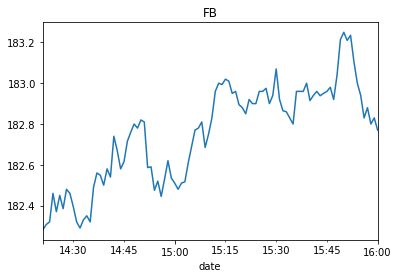

In [11]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [12]:
data.to_excel("fb_stock_data.xlsx")